# Partie 1:

**Télécharger le jeu de données**

In [ ]:
import pandas as pd
import re
#Charger le fichier texte sous python
my_file = open("/content/drive/My Drive/Colab Notebooks/DBLP_Subset.txt", "r")
content = my_file.read()
content_list = content.split("#*")
matrice=pd.DataFrame(columns=['Title','Authors','Year','Publication venue','ID','id_reference','Abstract','NbrAuthor','NbrCitations'])

#Réaliser les traitements de données afin d’extraire les informations séparément sous forme d’un dataframe.
for i in range(30000) :
  temp=list()
  temp=re.split('\n#@|\n#t|\n#c|\n#index|\n#!',content_list[i+1])
  if((len(temp)==6) ):
    tmp=temp[4].split("\n#%")
    id_reference  =tmp[1:]
    temp[4]=tmp[0]
    ref = ','.join([str(item) for item in id_reference])    
    matrice.loc[i, 'Title'] =temp[0]
    matrice.loc[i, 'Authors'] =temp[1].replace('\n', ',')
    matrice.loc[i, 'Year'] =temp[2]
    matrice.loc[i, 'Publication venue'] =temp[3]
    matrice.loc[i, 'ID'] =temp[4]
    if (ref != ''):
      matrice.loc[i, 'id_reference'] =ref  
    matrice.loc[i, 'Abstract'] =temp[5]
matrice.reset_index(drop=True, inplace=True)
matrice.shape


print 111 The Use of Anaphoric Resolution for Document Description in Information Retrieval.
#@Susan Bonzi,Elizabeth D. Liddy
#t1988
#cSIGIR
#index594584
#%2025
#%595464
#!This study investigated two hypotheses concerning the use of anaphors in information retrieval. The first hypothesis, that anaphors tend to refer to integral concepts rather than to peripheral concepts, was well supported. Two samples of documents, one in psychology and the other in computer science, were examined by subject experts who judged the centrality of phrases which were referred to anaphorically. The second hypothesis, that various term weighting schemes are affected differently by anaphoric resolution, was also well supported. It was found that schemes which incorporate document length into the calculations produce much smaller increases in term weights for terms occurring in anaphoric resolutions than do those which do not consider document length. It is concluded that although anaphoric resolution has po

(13989, 9)

**Sélectionner les trois ‘Venues’ suivante SIGIR, SIGMOD et STOC.** 
**Limiter le nombre de document** 

In [ ]:
matrice_SIGIR = matrice.loc[matrice['Publication venue'].isin(['SIGIR'])].head(200)
print(matrice_SIGIR.shape)
matrice_SIGIR.reset_index(drop=True, inplace=True)
matrice_SIGMOD = matrice.loc[matrice['Publication venue'].isin(['SIGMOD Conference'])].head(200)
print(matrice_SIGMOD.shape)
matrice_SIGMOD.reset_index(drop=True, inplace=True)
matrice_STOC = matrice.loc[matrice['Publication venue'].isin(['STOC'])].head(200)
print(matrice_STOC.shape)
matrice_STOC.reset_index(drop=True, inplace=True)
# concaténer les trois types de revues
pdList = [matrice_SIGIR, matrice_SIGMOD, matrice_STOC]  # List of your dataframes
matrice = pd.concat(pdList)
matrice.reset_index(drop=True, inplace=True)

(200, 9)
(200, 9)
(200, 9)
                                                 Title  ... NbrCitations
0    Formal models for expert finding in enterprise...  ...          NaN
1    Latent Semantic Indexing is an Optimal Special...  ...          NaN
2    Latent semantic-space: iterative scaling impro...  ...          NaN
3    Planning in an Expert System for Automated Inf...  ...          NaN
4    Discovering and structuring information flow a...  ...          NaN
..                                                 ...  ...          ...
595         Linear Time Bounds for Median Computations  ...          NaN
596      Linear Approximation of Shortest Superstrings  ...          NaN
597                  Fast quantum byzantine agreement.  ...          NaN
598           Designing Programs That Check Their Work  ...          NaN
599  Byzantine agreement in the full-information mo...  ...          NaN

[600 rows x 9 columns]


In [ ]:
matrice.count()

Title                600
Authors              600
Year                 600
Publication venue    600
ID                   600
id_reference         559
Abstract             600
NbrAuthor              0
NbrCitations           0
dtype: int64

In [ ]:
from nltk.corpus import stopwords # Pour les mots comme le...
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer 
from wordcloud import WordCloud, STOPWORDS
import matplotlib
import nltk
nltk.download('stopwords')
import pandas as pd
nltk.download('wordnet')
import numpy as np 
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# préptraitement des termes de l'abstract
stop=stopwords.words('french')+ stopwords.words('english')+["présentons", "présente", "résultats","comme","dune", 'dun', 'afin','entre', 'article','ainsi','partir', 'plus','très', 'approche','méthodes', 'méthode','données', 'proposons','permet' ,'deux']
stop=np.unique(stop).tolist()
matrice=matrice.dropna(subset=['Abstract']) # enlever les NA  ( supprimer les articles sans abstract )
matrice['Abstract']=matrice['Abstract'].apply(lambda x:" ".join(x.lower() for x in x.split()))
print(matrice.loc[3, 'Title'])
matrice['Abstract']=matrice['Abstract'].str.replace('[^\w\s\n\d"]',' ') # suppression de caractère spéciaux 
matrice['Abstract']=matrice['Abstract'].str.replace('[\d]',' ') # suppression de caractère spéciaux 
matrice['Abstract']=matrice['Abstract'].str.replace('["]',' ') # suppression de caractère spéciaux 
matrice['Abstract']=matrice['Abstract'].str.strip('"')
print(matrice['Abstract'])
matrice['Abstract']=matrice['Abstract'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))# suppression des stop word 
matrice['Abstract']=matrice['Abstract'].apply(lambda x:" ".join( [Word(word).lemmatize() for word in x.split()]))#etapes de lematisation remettre le mot à sa racine 
matrice['Abstract']=matrice['Abstract'].str.strip('"')
matrice['Abstract']=matrice['Abstract'].str.replace('["]','') 
matrice.reset_index(drop=True, inplace=True)

Planning in an Expert System for Automated Information Retrieval.
0      searching an organization s document repositor...
1      latent semantic indexing  lsi  is a technique ...
2      we present a novel algorithm that creates docu...
3      searching online databases requires an informa...
4      in this poster  we present a model of the flow...
                             ...                        
595    new upper and lower bounds are presented for t...
596    we consider the following problem  given a col...
597    we present a fast quantum byzantine agreement ...
598    a program correctness checker is an algorithm ...
599    we present a randomized byzantine agreement  b...
Name: Abstract, Length: 600, dtype: object


In [ ]:
## préptraitement des termes du titre
print(matrice['Title'])
matrice=matrice.dropna(subset=['Title']) # enlever les NA  ( supprimer les articles sans abstract )
matrice['Title']=matrice['Title'].apply(lambda x:" ".join(x.lower() for x in x.split()))
print(matrice['Title'])
matrice['Title']=matrice['Title'].str.replace('[^\w\s\n\d"]','') # suppression de caractère spéciaux 
matrice['Title']=matrice['Title'].str.replace('[\d]',' ') # suppression de caractère spéciaux 
matrice['Title']=matrice['Title'].str.replace('["]',' ') # suppression de caractère spéciaux 
matrice['Title']=matrice['Title'].str.strip('"')
print(matrice['Title'])
matrice['Title']=matrice['Title'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))# suppression des stop word 
matrice['Title']=matrice['Title'].apply(lambda x:" ".join( [Word(word).lemmatize() for word in x.split()]))#etapes de lematisation remettre le mot à sa racine 
matrice['Title']=matrice['Title'].str.strip('"')
matrice['Title']=matrice['Title'].str.replace('["]','') 

0      Formal models for expert finding in enterprise...
1      Latent Semantic Indexing is an Optimal Special...
2      Latent semantic-space: iterative scaling impro...
3      Planning in an Expert System for Automated Inf...
4      Discovering and structuring information flow a...
                             ...                        
595           Linear Time Bounds for Median Computations
596        Linear Approximation of Shortest Superstrings
597                    Fast quantum byzantine agreement.
598             Designing Programs That Check Their Work
599    Byzantine agreement in the full-information mo...
Name: Title, Length: 600, dtype: object
0      formal models for expert finding in enterprise...
1      latent semantic indexing is an optimal special...
2      latent semantic-space: iterative scaling impro...
3      planning in an expert system for automated inf...
4      discovering and structuring information flow a...
                             ...                

In [ ]:
#Construire la matrice Documents-termes pour l'abstract des articles
matrice.reset_index(drop=True, inplace=True)
vectorizer=CountVectorizer(max_features=1000,lowercase=True, ngram_range=(1,1), analyzer ="word")
matrice_doc_terms=vectorizer.fit_transform(matrice['Abstract']) # obtenir la matrice sparce 
print("matrice_doc_terms",matrice_doc_terms)
matrice_doc_terms2=matrice_doc_terms.todense()
print("matrice_doc_terms2",matrice_doc_terms2)
abstract= np.asarray(vectorizer.get_feature_names())
print("abstract",abstract)
matrice_doc_terms2.shape

matrice_doc_terms   (0, 803)	2
  (0, 630)	1
  (0, 270)	4
  (0, 334)	6
  (0, 716)	1
  (0, 203)	1
  (0, 280)	1
  (0, 852)	1
  (0, 901)	1
  (0, 369)	2
  (0, 683)	1
  (0, 939)	1
  (0, 395)	1
  (0, 880)	2
  (0, 404)	1
  (0, 138)	1
  (0, 961)	2
  (0, 692)	1
  (0, 572)	3
  (0, 371)	2
  (0, 260)	1
  (0, 494)	1
  (0, 77)	1
  (0, 60)	2
  (0, 804)	3
  :	:
  (599, 72)	1
  (599, 838)	1
  (599, 385)	2
  (599, 921)	1
  (599, 529)	1
  (599, 618)	1
  (599, 777)	1
  (599, 183)	1
  (599, 825)	1
  (599, 155)	1
  (599, 12)	1
  (599, 329)	1
  (599, 673)	1
  (599, 600)	1
  (599, 666)	4
  (599, 41)	1
  (599, 360)	1
  (599, 180)	1
  (599, 709)	3
  (599, 674)	1
  (599, 160)	1
  (599, 791)	1
  (599, 146)	1
  (599, 728)	2
  (599, 787)	3
matrice_doc_terms2 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
abstract ['ability' 'able' 'access' 'according' 'accuracy' 'accurate' 'accurately'
 'achieve' 'achieved' 'acm' 'across' 'actual' 'adaptive' 'a

(600, 1000)

In [ ]:
#Construire la matrice Documents-termes pour le titre des articles
vectorizer_title=CountVectorizer(max_features=1000,lowercase=True, ngram_range=(1,1), analyzer ="word")
print("vectorizer_title",vectorizer_title)
matrice_title_terms=vectorizer_title.fit_transform(matrice['Title']) # obtenir la matrice sparce 
print("matrice_title_terms",matrice_title_terms)
matrice_title_terms2=matrice_title_terms.todense()
print("matrice_doc_terms2",matrice_title_terms2)
title= np.asarray(vectorizer_title.get_feature_names())
print("title",title)

vectorizer_title CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
matrice_title_terms   (0, 316)	1
  (0, 420)	1
  (0, 282)	1
  (0, 311)	1
  (0, 252)	1
  (0, 134)	1
  (1, 375)	1
  (1, 721)	1
  (1, 352)	1
  (1, 461)	1
  (1, 780)	1
  (1, 53)	1
  (1, 427)	1
  (1, 698)	1
  (2, 375)	1
  (2, 698)	1
  (2, 724)	1
  (2, 369)	1
  (2, 534)	1
  (2, 745)	1
  (2, 406)	1
  (3, 282)	1
  (3, 515)	1
  (3, 850)	1
  (3, 27)	1
  :	:
  (594, 362)	1
  (594, 23)	1
  (594, 574)	1
  (594, 365)	1
  (594, 652)	1
  (595, 385)	1
  (595, 90)	1
  (595, 44)	1
  (595, 876)	1
  (596, 385)	1
  (596, 19)	1
  (596, 741)	1
  (596, 835)	1
  (597, 307)	1
  (597, 601)	

In [ ]:
#Ajouter une colonne ‘Id’ représentant l’identifiant du document aux matrices Documents-termes "abstract".
matrice_term_index=pd.DataFrame(data=matrice_doc_terms2, columns=abstract)
#matrice_term_index["ID"]=matrice['ID']
matrice_term_index=pd.concat([matrice_term_index, matrice['ID']], axis = 1)
print("1er ",matrice_term_index)
print("2eme",matrice_term_index.loc[0, 'ID'])
#Ajouter une colonne ‘Id’ représentant l’identifiant du document aux matrices Documents-termes "title".
matrice_title_index=pd.DataFrame(data=matrice_title_terms2, columns=title)
#matrice_term_index["ID"]=matrice['ID']
matrice_title_index=pd.concat([matrice_title_index, matrice['ID']], axis = 1)
print("1er ",matrice_title_index)
print("2eme",matrice_title_index.loc[0, 'ID'])


1er       ability  able  access  according  accuracy  ...  year  yet  yield  zero      ID
0          0     0       0          0         0  ...     0    0      0     0  594377
1          0     0       0          0         0  ...     0    0      0     0  594378
2          0     0       0          0         0  ...     0    0      0     0  594379
3          0     0       0          0         0  ...     0    0      0     0  594381
4          0     0       0          0         0  ...     0    0      0     0  594383
..       ...   ...     ...        ...       ...  ...   ...  ...    ...   ...     ...
595        0     0       0          0         0  ...     0    0      0     0  621461
596        0     0       0          0         0  ...     0    1      0     0  621463
597        0     0       0          0         0  ...     0    0      0     0  621464
598        0     0       0          0         0  ...     0    0      0     0  621465
599        0     0       0          0         0  ...     0  

In [ ]:
# prétraitement de la colone authors
print(matrice['Authors'])
matrice=matrice.dropna(subset=['Authors']) # enlever les NA  ( supprimer les articles sans abstract )
def splitauthor(authors):
  temp = authors.lower()
  splitted_authors = []
  for author in re.split('\n|,',temp):
    splitted_authors.append(author.strip())
  return splitted_authors
matrice["splitted_authors"] = matrice["Authors"].apply(splitauthor)
print(matrice["splitted_authors"])
all_authors = []
for index, row in matrice.iterrows():
  for author in row["splitted_authors"]:
    if author not in all_authors:
      all_authors.append(author)
print("all_authors",all_authors)
len(all_authors)

0        Krisztian Balog,Leif Azzopardi,Maarten de Rijke
1      Brian T. Bartell,Garrison W. Cottrell,Richard ...
2                                        Rie Kubota Ando
3                         Christine Barthes,Pierre Glize
4                        Joan C. Bartlett,Elaine G. Toms
                             ...                        
595    Manuel Blum,Robert W. Floyd,Vaughan R. Pratt,R...
596    Avrim Blum,Tao Jiang,Ming Li,John Tromp,Mihali...
597                     Michael Ben-Or,Avinatan Hassidim
598                           Manuel Blum,Sampath Kannan
599      Michael Ben-Or,Elan Pavlov,Vinod Vaikuntanathan
Name: Authors, Length: 600, dtype: object
0      [krisztian balog, leif azzopardi, maarten de r...
1      [brian t. bartell, garrison w. cottrell, richa...
2                                      [rie kubota ando]
3                      [christine barthes, pierre glize]
4                     [joan c. bartlett, elaine g. toms]
                             ...              

1121

In [ ]:
#Créer un dataframe représentant les auteurs
author_map = {x:i for i,x in enumerate(all_authors)}
# attribuer à chaque auteur un identifiant ‘id_auteur’
list_name=author_map.keys()
list_ID=author_map.values()
author_dataframe =pd.DataFrame(
    {'Author_ID': list_ID,
     'Authors': list_name,
        })
print(author_map.values())
print(author_dataframe)

author_map {'krisztian balog': 0, 'leif azzopardi': 1, 'maarten de rijke': 2, 'brian t. bartell': 3, 'garrison w. cottrell': 4, 'richard k. belew': 5, 'rie kubota ando': 6, 'christine barthes': 7, 'pierre glize': 8, 'joan c. bartlett': 9, 'elaine g. toms': 10, 'm. bärtschi': 11, 'hans-peter frei': 12, 'justin basilico': 13, 'thomas hofmann': 14, 'holger bast': 15, 'debapriyo majumdar': 16, 'ingmar weber': 17, 'madeleine bates': 18, 'robert j. bobrow': 19, 'mayank bawa': 20, 'gurmeet singh manku': 21, 'prabhakar raghavan': 22, 'anthony q. baxter': 23, 'rowland r. johnson': 24, 'jan de beer': 25, 'marie-francine moens': 26, 'steven m. beitzel': 27, 'eric c. jensen': 28, 'abdur chowdhury': 29, 'david a. grossman': 30, 'ophir frieder': 31, 'greg pass': 32, 'nicholas j. belkin': 33, 'barbara h. kwasnik': 34, 'gordon bell': 35, 'jim gemmell': 36, 'roger lueder': 37, 'timothy a. h. bell': 38, 'alistair moffat': 39, 'ijsbrand jan aalbersberg': 40, 'jeffery antoniuk': 41, 'mario a. nascimento':

In [ ]:
#Construire la matrice Documents-auteurs
matrice_doc_authors= np.zeros((len(matrice), len(all_authors)), dtype=int)
for index, row in matrice.reset_index().iterrows():
  for author in row["splitted_authors"]:
    matrice_doc_authors[index, author_map[author]] = 1
print("matrice_doc_authors",matrice_doc_authors)

dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

In [ ]:
#Insérer une colonne ‘Id’ représentant l’identifiant du document.
matrice_authors_index=pd.DataFrame(data=matrice_doc_authors, columns=all_authors)
matrice_authors_index=pd.concat([matrice_authors_index, matrice['ID']], axis = 1)
print("1er ",matrice_authors_index)
print("2eme",matrice_authors_index.loc[0, 'ID'])

1er       krisztian balog  leif azzopardi  ...  vinod vaikuntanathan      ID
0                  1               1  ...                     0  594377
1                  0               0  ...                     0  594378
2                  0               0  ...                     0  594379
3                  0               0  ...                     0  594381
4                  0               0  ...                     0  594383
..               ...             ...  ...                   ...     ...
595                0               0  ...                     0  621461
596                0               0  ...                     0  621463
597                0               0  ...                     0  621464
598                0               0  ...                     0  621465
599                0               0  ...                     1  621468

[600 rows x 1122 columns]
2eme 594377


**Générer les fichiers CSV pour ces tableaux de données**

In [ ]:
matrice_authors_index_csv=matrice_authors_index.to_csv(
path_or_buf="/content/drive/My Drive/Colab Notebooks/matrice_authors_index_csv.csv"
,index=False, sep='\t')

In [ ]:
author_dataframe_csv=author_dataframe.to_csv(
path_or_buf="/content/drive/My Drive/Colab Notebooks/author_dataframe_csv.csv"
,index=False, sep='\t')

In [ ]:
matrice_term_index_csv=matrice_term_index.to_csv(
path_or_buf="/content/drive/My Drive/Colab Notebooks/matrice_term_index_csv.csv"
,index=False, sep='\t')

In [ ]:
matrice_title_index_csv=matrice_title_index.to_csv(
path_or_buf="/content/drive/My Drive/Colab Notebooks/matrice_title_index_csv.csv"
,index=False, sep='\t')

**Création de la matrice document citation**

In [ ]:
reference_map = {x:i for i,x in enumerate(matrice["ID"])}
matrice_doc_references= np.zeros((len(matrice), len(matrice["ID"])), dtype=int)
for index, row in matrice.reset_index().iterrows():
  for reference in str(row["id_reference"]).split(","):
    if reference in reference_map:
      matrice_doc_references[index, reference_map[reference]] = 1
print("matrice_doc_references",matrice_doc_references)
matrice_doc_references.shape
matrice_doc_citations=matrice_doc_references.transpose()

matrice_doc_references [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


**Remplir la colone NbrCitation dans la matrice principale**

In [ ]:
for i in range (len(matrice["splitted_authors"])):
  matrice.loc[i, 'NbrAuthor']=len(matrice.loc[i,'splitted_authors'])
print(matrice['NbrAuthor'])
matrice['NbrCitations']=np.sum(matrice_doc_citations, axis = 1)
print(matrice.head())

1
0      3
1      3
2      1
3      2
4      2
      ..
595    5
596    5
597    2
598    2
599    3
Name: NbrAuthor, Length: 600, dtype: object
print 222 771904,2025
print 444 0      0
1      2
2      2
3      0
4      0
      ..
595    0
596    0
597    0
598    1
599    0
Name: NbrCitations, Length: 600, dtype: int64
                                               Title  ...                                   splitted_authors
0      formal model expert finding enterprise corpus  ...  [krisztian balog, leif azzopardi, maarten de r...
1  latent semantic indexing optimal special case ...  ...  [brian t. bartell, garrison w. cottrell, richa...
2  latent semanticspace iterative scaling improve...  ...                                  [rie kubota ando]
3  planning expert system automated information r...  ...                  [christine barthes, pierre glize]
4  discovering structuring information flow among...  ...                 [joan c. bartlett, elaine g. toms]

[5 rows x 10 columns]


In [ ]:
matrice.reset_index(drop=True, inplace=True)
matrice.to_csv(
path_or_buf="/content/drive/My Drive/Colab Notebooks/matrice_csv.csv"
,index=False, sep='\t')

# Partie 3

**Construire les quatre graphes co-termes (titre), co-termes (abstract), co-auteurs, citations.**

In [ ]:
abstract_mat = matrice_doc_terms2.dot(matrice_doc_terms2.transpose()) # M*M'
print(abstract_mat.shape)
print("abstract_mat",abstract_mat)

title_mat = matrice_title_terms2.dot(matrice_title_terms2.transpose())
print("title_mat.shape")
print("title_mat",title_mat)

author_mat = matrice_doc_authors.dot(matrice_doc_authors.transpose())
print(author_mat.shape)
print("author_mat",author_mat)

(600, 600)
abstract_mat [[135  25  30 ...   2   1   4]
 [ 25 177  46 ...   4   7  12]
 [ 30  46 100 ...   2   6   9]
 ...
 [  2   4   2 ...  24   0  24]
 [  1   7   6 ...   0  70   4]
 [  4  12   9 ...  24   4  84]]
title_mat.shape
title_mat [[6 0 0 ... 0 0 1]
 [0 8 2 ... 0 0 0]
 [0 2 7 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 2]
 [0 0 0 ... 0 3 0]
 [1 0 0 ... 2 0 5]]
(600, 600)
author_mat [[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 1]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 1 0 3]]


In [ ]:
!pip install python-louvain

In [ ]:
!pip install networkx

In [ ]:
pip install cluster_ensembles 

In [ ]:
!sudo apt-get install metis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
metis is already the newest version (5.1.0.dfsg-5).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
pip list  -v 

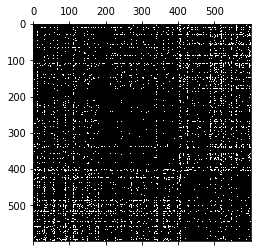

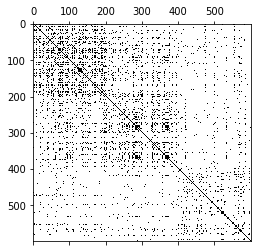

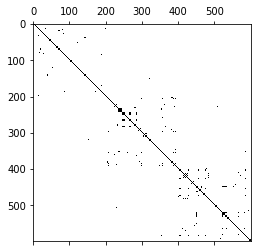

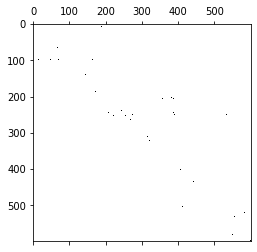

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import community
import networkx as nx
####################################################
# Detection de communautés: application de l'algorithme de Louvain 

#### graphe non-orienté : matrice d'adjacence symetrique
# Affichage de la matrice d’adjacence  
plt.spy(abstract_mat) 
plt.show() 
# Affichage de la matrice d’adjacence 
plt.spy(title_mat) 
plt.show() 
# Affichage de la matrice d’adjacence 
plt.spy(author_mat) 
plt.show() 

# Affichage de la matrice d’adjacence 
plt.spy(matrice_doc_citations) 
plt.show() 

# création du graphe à l’aide du package networkx
g_non_orient_abstract = nx.from_numpy_matrix(abstract_mat) 
g_non_orient_title = nx.from_numpy_matrix(title_mat)
g_non_orient_author = nx.from_numpy_matrix(author_mat) 
g_non_orient_citation = nx.from_numpy_matrix(matrice_doc_citations) 

**Réaliser un clustering à l’aide à l’aide de l’algorithme de Louvain sur les quatre graphes.**

In [ ]:
# Detection de communautés: application de l'algorithme de Louvain 
partition_doc_term = community.best_partition(g_non_orient_abstract) 
print("partition doc term", partition_doc_term)
partition_tit_term = community.best_partition(g_non_orient_title)
print("partition title term", partition_tit_term)
partition_doc_auth = community.best_partition(g_non_orient_author)
print("partition doc author", partition_doc_auth) 
partition_doc_citation = community.best_partition(g_non_orient_citation)
print("partition doc citation", partition_doc_citation) 

partition doc term {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 2, 6: 0, 7: 0, 8: 2, 9: 0, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 2, 23: 0, 24: 0, 25: 2, 26: 0, 27: 0, 28: 2, 29: 3, 30: 2, 31: 4, 32: 1, 33: 0, 34: 0, 35: 0, 36: 5, 37: 0, 38: 0, 39: 2, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 5, 50: 2, 51: 2, 52: 0, 53: 0, 54: 0, 55: 0, 56: 2, 57: 2, 58: 2, 59: 0, 60: 0, 61: 1, 62: 2, 63: 0, 64: 5, 65: 4, 66: 0, 67: 5, 68: 1, 69: 2, 70: 2, 71: 0, 72: 2, 73: 2, 74: 2, 75: 2, 76: 2, 77: 0, 78: 2, 79: 0, 80: 2, 81: 2, 82: 0, 83: 0, 84: 0, 85: 4, 86: 1, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 1, 95: 0, 96: 2, 97: 0, 98: 0, 99: 5, 100: 0, 101: 0, 102: 0, 103: 1, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 2, 111: 0, 112: 0, 113: 2, 114: 2, 115: 0, 116: 4, 117: 0, 118: 0, 119: 2, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 4, 132: 4, 133: 0, 134: 0, 135: 1, 13

**Réaliser un  consensus entre les partitions otenues par l'algorithme de louvrai sur les trois graphes de documents**

In [ ]:
import numpy as np 
import Cluster_Ensembles as CE 
cluster_runs = np.array([list(partition_tit_term.values()),
                         list(partition_doc_term.values()),
                         list(partition_doc_auth.values()),
                         list(partition_doc_citation.values())])
print("cluster_runs", cluster_runs) 
consensus_clustering_labels = CE.cluster_ensembles(cluster_runs, verbose = True, N_clusters_max = 5) 
print("consensus_clustering_labels", consensus_clustering_labels) 

cluster_runs [[  0   1   0 ...   6   6   0]
 [  0   0   0 ...   5   5   5]
 [  0   1   2 ... 175 224 175]
 [  0   1   1 ... 325 417 418]]
*****
INFO: Cluster_Ensembles: CSPA: consensus clustering using CSPA.

#
INFO: Cluster_Ensembles: wgraph: writing wgraph_CSPA.
#

#
INFO: Cluster_Ensembles: sgraph: calling gpmetis for graph partitioning.
INFO: Cluster_Ensembles: sgraph: (hyper)-graph partitioning completed; loading wgraph_CSPA.part.5
#

INFO: Cluster_Ensembles: cluster_ensembles: CSPA at 0.4361888357741832.
*****

*****
INFO: Cluster_Ensembles: HGPA: consensus clustering using HGPA.

#
INFO: Cluster_Ensembles: wgraph: writing wgraph_HGPA.
INFO: Cluster_Ensembles: wgraph: 600 vertices and 670 non-zero hyper-edges.
#

#
INFO: Cluster_Ensembles: sgraph: calling shmetis for hypergraph partitioning.
INFO: Cluster_Ensembles: sgraph: (hyper)-graph partitioning completed; loading wgraph_HGPA.part.5
#

INFO: Cluster_Ensembles: cluster_ensembles: HGPA at 0.302949560213323.
*****

*****
INFO: 

In [ ]:
# Enregistrer les résultats sous format CSV
clust_abstract=partition_doc_term.values()
clust_title=partition_tit_term.values()
clust_authors=partition_doc_auth.values()
clust_citation=partition_doc_citation.values()
list_ID=matrice['ID']
Cluster_dataframe =pd.DataFrame(
    {'ID': list_ID,
     'Clust_Abstract': clust_abstract,
     'Clust_Title': clust_title,
     'Clust_Authors': clust_authors,
     'Clust_Citation': clust_citation,
     'Consensus':consensus_clustering_labels,
        })
print(Cluster_dataframe)

         ID  Clust_Abstract  ...  Clust_Citation  Consensus
0    594377               0  ...               0          4
1    594378               0  ...               1          3
2    594379               0  ...               1          4
3    594381               0  ...               2          3
4    594383               1  ...               3          0
..      ...             ...  ...             ...        ...
595  621461               5  ...             415          1
596  621463               5  ...             416          1
597  621464               5  ...             325          1
598  621465               5  ...             417          1
599  621468               5  ...             418          0

[600 rows x 6 columns]


In [ ]:
# charger sous format csv
Cluster_dataframe.to_csv(
path_or_buf="/content/drive/My Drive/Colab Notebooks/Cluster_dataframe_csv.csv"
,index=False, sep='\t')


 **Analyse des communauté**

**Construire les matrices thematique- authors thematique termes pour faire Le vecteur centre (moyen) pour chaque cluster**

In [ ]:
matrice_partition_Z = np.zeros((len(matrice), int(len(set(consensus_clustering_labels)))))

In [ ]:
for i, x in enumerate(consensus_clustering_labels):
  matrice_partition_Z[i,x] = 1
print("matrice_partition_Z",matrice_partition_Z)

matrice_partition_Z [[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
thematique_termes_abstract = matrice_partition_Z.transpose().dot(matrice_doc_terms2)
print("thematique_termes_abstract",thematique_termes_abstract)
thematique_termes_title = matrice_partition_Z.transpose().dot(matrice_title_terms2)
print("thematique_termes_title",thematique_termes_title)
thematique_authors = matrice_partition_Z.transpose().dot(matrice_doc_authors)
print("thematique_termes_authors",thematique_termes_authors)

thematique_termes_abstract [[ 1.  6.  8. ...  3.  4. 13.]
 [ 1.  2. 11. ...  6.  9.  6.]
 [ 9. 12. 37. ...  5.  3.  1.]
 [ 8.  2. 19. ...  1.  5.  0.]
 [ 7.  5.  9. ...  2.  3.  0.]]
thematique_termes_title [[0. 9. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 4. ... 0. 0. 0.]
 [1. 0. 2. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 3. 0.]]
thematique_termes_authors [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 3. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
index=pd.DataFrame([0,1,2,3,4])
thematique_termes_abstract=pd.DataFrame(data=thematique_termes_abstract, columns=abstract)
print("1er ",thematique_termes_abstract)
thematique_termes_abstract=pd.concat([thematique_termes_abstract, index], axis = 1)

thematique_termes_title=pd.DataFrame(data=thematique_termes_title, columns=title)
print("2er ",thematique_termes_title)
thematique_termes_title=pd.concat([thematique_termes_title, index], axis = 1)

thematique_authors=pd.DataFrame(data=thematique_authors, columns=all_authors)
print("3er ",thematique_authors)
thematique_authors=pd.concat([thematique_authors, index], axis = 1)

1er     ability  able  access  according  accuracy  ...  xquery  year  yet  yield  zero
0      1.0   6.0     8.0        4.0       3.0  ...     0.0   5.0  3.0    4.0  13.0
1      1.0   2.0    11.0        3.0       2.0  ...     0.0   4.0  6.0    9.0   6.0
2      9.0  12.0    37.0        4.0      11.0  ...     6.0   7.0  5.0    3.0   1.0
3      8.0   2.0    19.0        2.0       5.0  ...     0.0   3.0  1.0    5.0   0.0
4      7.0   5.0     9.0        1.0       7.0  ...    19.0   3.0  2.0    3.0   0.0

[5 rows x 1000 columns]
1er     absence  abstract  access  across  ...  xmlbased  xqbe  xquery  yellowpager
0      0.0       9.0     0.0     0.0  ...       0.0   0.0     0.0          1.0
1      0.0       1.0     0.0     0.0  ...       0.0   0.0     0.0          0.0
2      0.0       0.0     4.0     1.0  ...       0.0   0.0     0.0          0.0
3      1.0       0.0     2.0     0.0  ...       0.0   0.0     0.0          0.0
4      0.0       0.0     1.0     1.0  ...       1.0   1.0     3.0       

**Générer les fichiers CSV pour ces tableaux de données thematique abstract et authors**

In [ ]:
thematique_termes_abstract.to_csv(path_or_buf="/content/drive/My Drive/Colab Notebooks/thematique_termes_abstract.csv",index=False, sep='\t')
thematique_termes_title.to_csv(path_or_buf="/content/drive/My Drive/Colab Notebooks/thematique_termes_title.csv",index=False, sep='\t')
thematique_authors.to_csv(path_or_buf="/content/drive/My Drive/Colab Notebooks/thematique_authors.csv",index=False, sep='\t')

**les figures de graphes obtenus par la détection de communautés.**

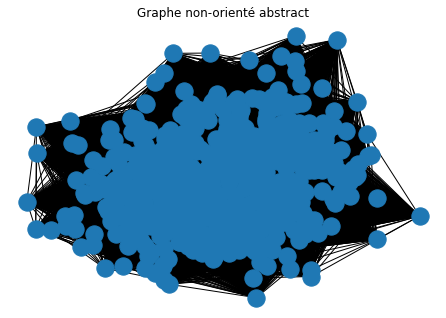

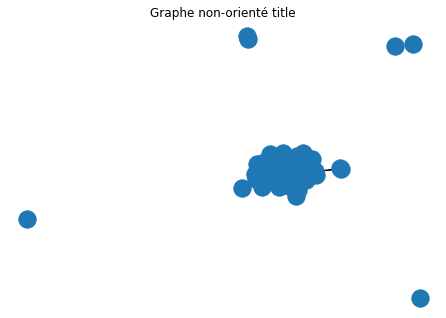

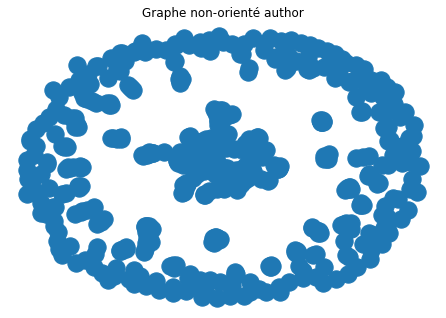

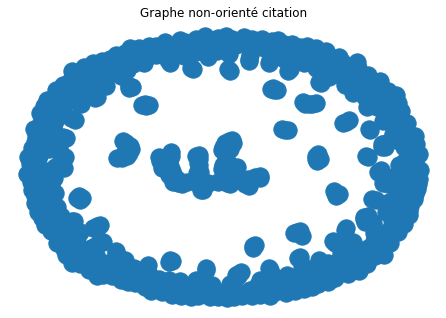

In [ ]:
# Affichage du gaphe abstract
nx.draw(g_non_orient_abstract)
plt.title("Graphe non-orienté abstract") 
plt.show()
plt.savefig("/content/drive/My Drive/Colab Notebooks/abstract.png")

# Affichage du gaphe title 
nx.draw(g_non_orient_title)
plt.title("Graphe non-orienté title") 
plt.show()

# Affichage du gaphe author
nx.draw(g_non_orient_author)
plt.title("Graphe non-orienté author") 
plt.show()

# Affichage du gaphe citation
nx.draw(g_non_orient_citation)
plt.title("Graphe non-orienté citation") 
plt.show()

